In [97]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
import copy

In [98]:
# loading the dataset
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')

In [99]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [100]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [101]:
df.shape

(550068, 10)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


**Observations**

* Based on the analysis conducted above, it is evident that the dataset comprises a total of 10 features containing a mix of alphanumeric data.

* With the exception of the Purchase column, all other columns are categorical in nature. We intend to convert the data types of these columns to the 'category' type.

In [103]:
# Changing the Datatype of Columns
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [104]:
# Statistical Overview of object type columns
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933



**Analysis:**

1. User_ID:
The dataset consists of 550,068 transactions involving 5,891 unique user IDs.
The user with the ID 1001680 has the highest frequency of transactions, occurring 1,026 times.
2. Product_ID:
There are 3,631 unique products involved in the 550,068 transactions.
The product with the code P00265242 is the most frequently purchased, with a frequency of 1,880.
3. Gender:
The 'Gender' column has two unique values: 'M' and 'F'.
Male ('M') accounts for the majority of transactions, with a frequency of 414,259, making up about 75% of the total transactions.
4. Age:
There are seven unique age groups ('Age') in the dataset.
The age group '26-35' is the most common, with a frequency of 219,587 transactions.
5. Occupation:
The 'Occupation' column has 21 unique values.
Occupation code '4' has the highest frequency, occurring 72,308 times.
6. City_Category:
There are three unique city categories ('City_Category') denoted as 'A', 'B', and 'C'.
'B' is the most frequent city category, with a frequency of 231,173.
6. Stay_In_Current_City_Years:
The 'Stay_In_Current_City_Years' column has five unique values.
Customers with a stay duration of '1' year in the current city have the highest frequency, totaling 193,821 transactions.
7. Marital_Status:
The 'Marital_Status' column has two unique values: '0' and '1'.
Unmarried customers ('0') contribute to a higher frequency, representing 324,731 transactions.
8. Product_Category:
The 'Product_Category' column has 20 unique values.
Product category '5' is the most common, with a frequency of 150,933 transactions.

In [105]:
# Statistical summary of numerical data type columns
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


**Observations:**
The purchase amounts exhibit a broad range, spanning from a minimum of \$12 to a maximum of \$23,961. The median purchase amount, at \$8,047, is significantly lower than the mean purchase amount of \$9,264. This suggests a right-skewed distribution, indicating that a few high-value purchases are influencing the mean to be higher than the median.

In [106]:
# dulpicate detection
df.duplicated().sum()

0

**Insights**
There are no duplicate entries in the dataset.

In [107]:
#replacing the values in marital_status column

df['Marital_Status'] = df['Marital_Status'].replace({0:'Unmarried',1:'Married'})
df['Marital_Status'].unique()

['Unmarried', 'Married']
Categories (2, object): ['Unmarried', 'Married']

In [108]:
# Missing Value Analysis
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Insight:**
The dataset does not contain any missing values.

In [109]:
# Non-Graphical Analysis: Value counts and unique attributes ​

columns_to_analyze = ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
                       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase']

for column in columns_to_analyze:
    print(f"Column: {column}")
    print("Number of unique values:", df[column].nunique())
    print("Value counts:")
    print(df[column].value_counts())
    print("-" * 70)

Column: User_ID
Number of unique values: 5891
Value counts:
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002111       7
1005391       7
1002690       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
----------------------------------------------------------------------
Column: Product_ID
Number of unique values: 3631
Value counts:
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: Product_ID, Length: 3631, dtype: int64
----------------------------------------------------------------------
Column: Gender
Number of unique values: 2
Value counts:
M    414259
F    135809
Name: Gender, dtype: int64
----------------------------------------------------------------------
Column: Age
Number of unique values: 7
Value counts:
26-35    219587
36-45    110013
18-25     9

**Analysis:**

1. User_ID:
There are 5,891 unique user IDs in the dataset.
User ID 1001680 has the highest frequency, appearing 1,026 times.
2. Product_ID:
There are 3,631 unique product IDs in the dataset.
Product ID P00265242 is the most frequently occurring, with a frequency of 1,880.
3. Gender:
There are two unique genders: 'M' (Male) and 'F' (Female).
Male transactions ('M') significantly outnumber female transactions ('F').
4.Age:
There are seven unique age groups in the dataset.
The age group '26-35' has the highest frequency, with 219,587 transactions.
5.Occupation:
There are 21 unique occupation codes.
Occupation code '4' has the highest frequency, occurring 72,308 times.
6. City_Category:
There are three unique city categories: 'A', 'B', and 'C'.
City category 'B' has the highest frequency, with 231,173 occurrences.
7. Stay_In_Current_City_Years:
There are five unique values indicating the number of years a customer has stayed in the current city.
Customers with '1' year of stay have the highest frequency, totaling 193,821 transactions.
8. Marital_Status:
There are two unique marital status values: 'Unmarried' and 'Married'.
Unmarried customers significantly outnumber married customers.
9. Product_Category:
There are 20 unique product categories.
Product category '5' has the highest frequency, with 150,933 occurrences.
10. Purchase:
There are 18,105 unique purchase amounts in the dataset.
The purchase amount of '7011' has the highest frequency, appearing 191 times.

#**Univariate Analysis**
##**Numerical Variables**
###**Purchase Amount Distribution**

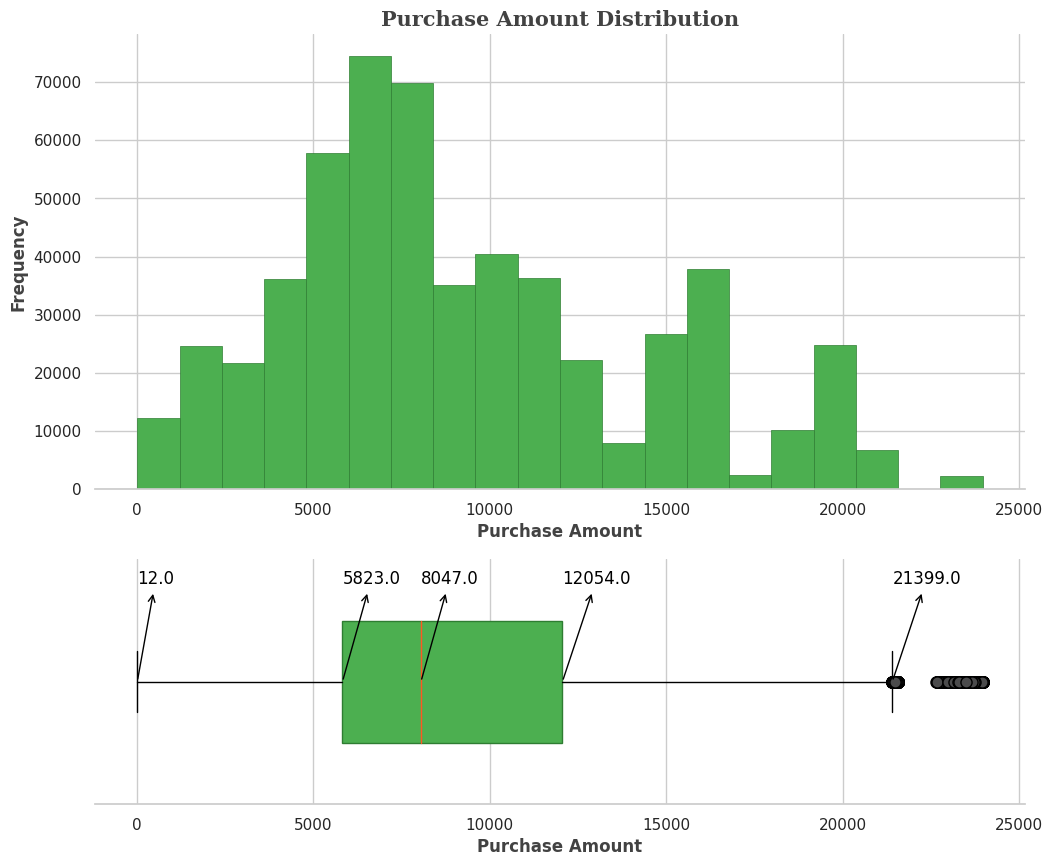

In [110]:
# Setting the plot style
sns.set(style="whitegrid")

# Creating the figure and gridspec
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[0.65, 0.35])

# Creating purchase amount histogram
ax0 = fig.add_subplot(gs[0, 0])

ax0.hist(df['Purchase'], color='#4CAF50', linewidth=0.5, edgecolor='#2E7D32', bins=20)
ax0.set_xlabel('Purchase Amount', fontsize=12, fontweight='bold', color='#424242')
ax0.set_ylabel('Frequency', fontsize=12, fontweight='bold', color='#424242')

# Removing the axis lines
for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)

# Setting title for visual
ax0.set_title('Purchase Amount Distribution', {'font': 'serif', 'size': 15, 'weight': 'bold'}, color='#424242')

# Creating box plot for purchase amount
ax1 = fig.add_subplot(gs[1, 0])
boxplot = ax1.boxplot(x=df['Purchase'], vert=False, patch_artist=True, widths=0.5)

# Customize box and whisker colors
boxplot['boxes'][0].set(facecolor='#4CAF50', edgecolor='#2E7D32')

# Customize median line
boxplot['medians'][0].set(color='#FF5722')

# Customize outlier markers
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor="#4b4b4c")

# Removing the axis lines
for s in ['top', 'left', 'right']:
    ax1.spines[s].set_visible(False)

# Adding 5 point summary annotations
info = [i.get_xdata() for i in boxplot['whiskers']]  # Getting the upper limit, Q1, Q3, and lower limit

median = df['Purchase'].quantile(0.5)  # Getting Q2

for i, j in info:
    ax1.annotate(text=f"{i:.1f}", xy=(i, 1), xytext=(i, 1.4), fontsize=12, color='black',
                 arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0", color='black'))

    ax1.annotate(text=f"{j:.1f}", xy=(j, 1), xytext=(j, 1.4), fontsize=12, color='black',
                 arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0", color='black'))

# Adding the median separately because it was included in the info list
ax1.annotate(text=f"{median:.1f}", xy=(median, 1), xytext=(median + 1, 1.4), fontsize=12, color='black',
             arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0", color='black'))

# Removing y-axis ticks
ax1.set_yticks([])

# Adding axis label
ax1.set_xlabel('Purchase Amount', fontweight='bold', fontsize=12, color='#424242')

plt.show()

**Calculating the Number of Outliers**

As seen above, Purchase amount over 21399 is considered as outlier. We will count the number of outliers as below:

In [111]:
len(df.loc[df['Purchase'] > 21399,'Purchase'])

2677


**Observations:**

**Outliers:**

A total of 2,677 outliers, comprising approximately 0.48% of the entire dataset related to purchase amounts, were identified. The decision was made not to eliminate them, as they provide valuable insights into a wide range of spending behaviors during the sale. This underscores the importance of tailoring marketing strategies to both regular and high-value customers to optimize revenue.

**Distribution:**

The data indicates that the majority of customers made purchases ranging from 5,823 USD to 12,054 USD, with the median purchase amount standing at 8,047 USD. The presence of a lower limit of 12 USD and an upper limit of 21,399 USD highlights substantial variability in customer spending patterns.

**Categorical Variables**

Gender, Marital Status and City Category Distribution

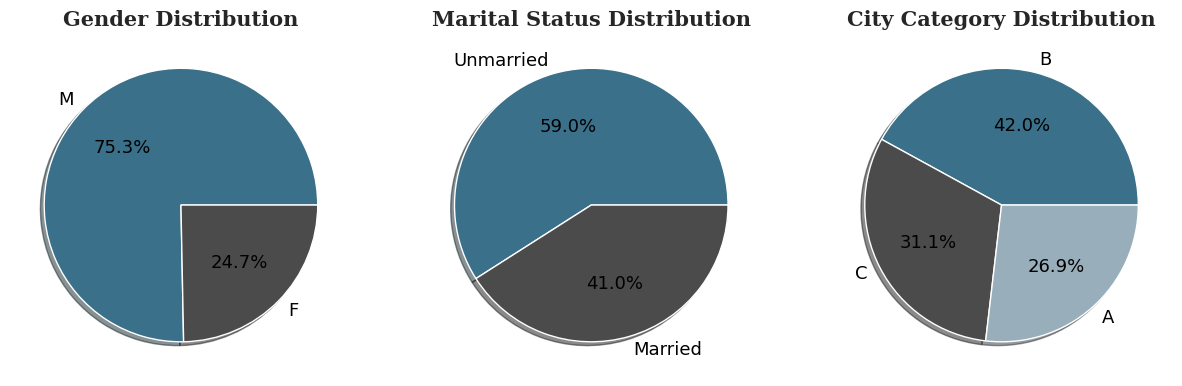

In [112]:
# Setting the plot style
fig, axes = plt.subplots(1, 3, figsize=(15, 12))

# Creating pie chart for gender distribution
ax0 = axes[0]
gender_colors = ["#3A7089", "#4b4b4c"]
ax0.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%.1f%%',
        shadow=True, colors=gender_colors, textprops={'fontsize': 13, 'color': 'black'})
ax0.set_title('Gender Distribution', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Creating pie chart for marital status
ax1 = axes[1]
marital_colors = ["#3A7089", "#4b4b4c"]
ax1.pie(df['Marital_Status'].value_counts(), labels=df['Marital_Status'].value_counts().index, autopct='%.1f%%',
        shadow=True, colors=marital_colors, textprops={'fontsize': 13, 'color': 'black'})
ax1.set_title('Marital Status Distribution', {'font': 'serif', 'size': 15, 'weight': 'bold'})

# Creating pie chart for city category
ax2 = axes[2]
city_colors = ["#3A7089", "#4b4b4c", '#99AEBB']
ax2.pie(df['City_Category'].value_counts(), labels=df['City_Category'].value_counts().index, autopct='%.1f%%',
        shadow=True, colors=city_colors, textprops={'fontsize': 13, 'color': 'black'})
ax2.set_title('City Category Distribution', {'font': 'serif', 'size': 15, 'weight': 'bold'})

plt.show()


**Observations**

1. Gender Distribution - The data reveals a noticeable difference in buying patterns between men and women during the Black Friday event.

2. Marital Status - Considering that unmarried individuals constitute a larger share of transactions, exploring targeted marketing campaigns or promotions tailored to this demographic could be beneficial.

3. City Category - City B recorded the highest number of transactions, followed by City C and then City A.

**Customer Age Distribution**

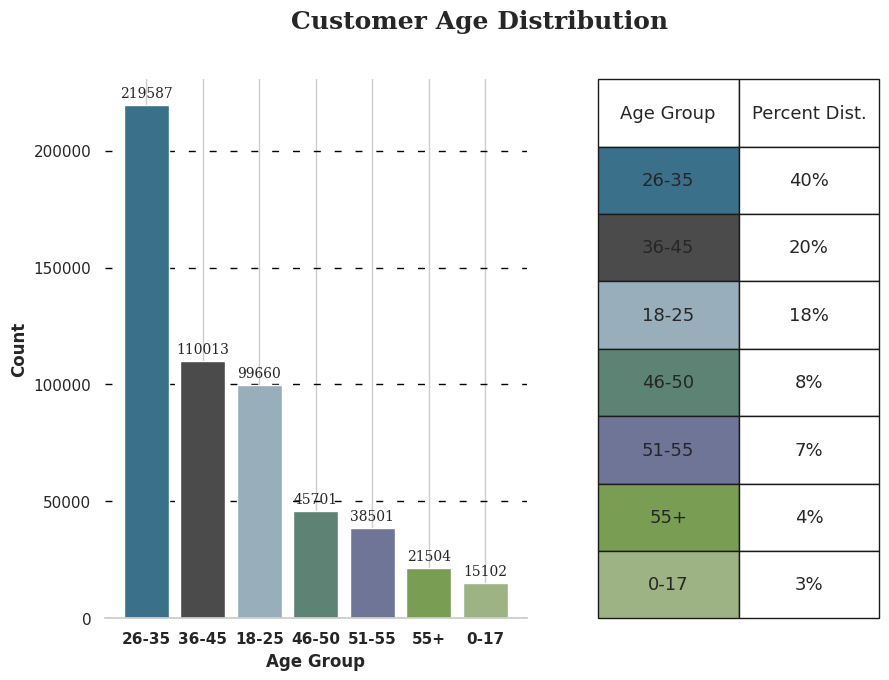

In [113]:
# Setting the plot style
fig, axes = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={'width_ratios': [0.6, 0.4]})

# Creating bar chart for age distribution
age_counts = df['Age'].value_counts()
colors = ["#3A7089", "#4b4b4c", '#99AEBB', '#5C8374', '#6F7597', '#7A9D54', '#9EB384']
axes[0].bar(x=age_counts.index, height=age_counts.values, color=colors, zorder=2)

# Adding value counts on top of bars
for i in age_counts.index:
    axes[0].text(i, age_counts[i] + 5000, age_counts[i], {'font': 'serif', 'size': 10}, ha='center', va='center')

# Adding grid lines
axes[0].grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

# Removing the axis lines
for s in ['top', 'left', 'right']:
    axes[0].spines[s].set_visible(False)

# Adding axis labels
axes[0].set_ylabel('Count', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Age Group', fontweight='bold', fontsize=12)
axes[0].set_xticklabels(age_counts.index, fontweight='bold')

# Creating an informative table for age distribution
age_info = [['26-35', '40%'], ['36-45', '20%'], ['18-25', '18%'], ['46-50', '8%'], ['51-55', '7%'], ['55+', '4%'],
            ['0-17', '3%']]
color_2d = [["#3A7089", '#FFFFFF'], ["#4b4b4c", '#FFFFFF'], ['#99AEBB', '#FFFFFF'], ['#5C8374', '#FFFFFF'],
            ['#6F7597', '#FFFFFF'],
            ['#7A9D54', '#FFFFFF'], ['#9EB384', '#FFFFFF']]

table = axes[1].table(cellText=age_info, cellColours=color_2d, cellLoc='center', colLabels=['Age Group', 'Percent Dist.'],
                      colLoc='center', bbox=[0, 0, 1, 1])

table.set_fontsize(15)

# Removing axes
axes[1].axis('off')

# Setting title for visual
fig.suptitle('Customer Age Distribution', font='serif', size=18, weight='bold')

plt.show()


**Insights**

* The age bracket of 26-35 stands out as the primary contributor to Walmart's Black Friday sales, constituting 40% of the total sales. This points towards the engagement and interest of young and middle-aged adults in pursuing shopping opportunities during the event, showcasing their active participation.

* Following closely, the 36-45 and 18-25 age groups represent the second and third significant segments, contributing 20% and 18% to the overall sales, respectively. This underscores the diversity of Walmart's customer base, encompassing individuals at different life stages and with varied preferences.

* In contrast, the age groups of 46-50, 51-55, 55+, and 0-17 emerge as relatively smaller segments, each contributing less than 10% to the total sales. This suggests an opportunity for Walmart to refine its marketing strategies and product offerings to attract a broader audience from these age categories, particularly focusing on seniors and children.

**Customer Stay In current City Distribution**

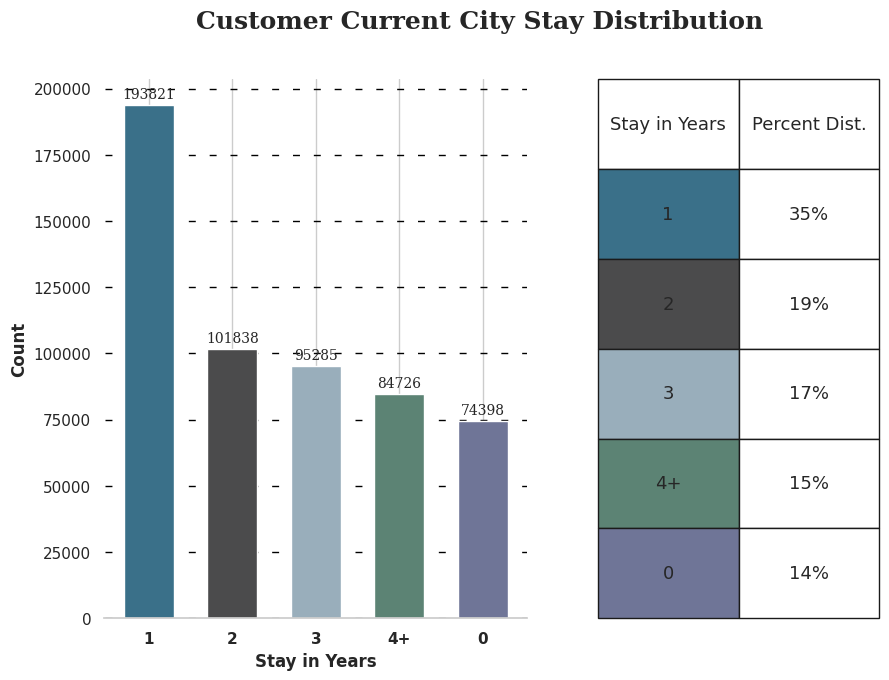

In [114]:
# Setting the plot style
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), gridspec_kw={'width_ratios': [0.6, 0.4]})

# Creating Bar Chart for Customer Stay in Current City
stay_color_map = ["#3A7089", "#4b4b4c", '#99AEBB', '#5C8374', '#6F7597']
stay_temp = df['Stay_In_Current_City_Years'].value_counts()
ax1.bar(x=stay_temp.index, height=stay_temp.values, color=stay_color_map, zorder=2, width=0.6)

# Adding the value_counts
for i in stay_temp.index:
    ax1.text(i, stay_temp[i] + 4000, stay_temp[i], {'font': 'serif', 'size': 10}, ha='center', va='center')

# Adding grid lines
ax1.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

# Removing the axis lines
for s in ['top', 'left', 'right']:
    ax1.spines[s].set_visible(False)

# Adding axis labels
ax1.set_ylabel('Count', fontweight='bold', fontsize=12)
ax1.set_xlabel('Stay in Years', fontweight='bold', fontsize=12)
ax1.set_xticklabels(stay_temp.index, fontweight='bold')

# Creating an Info Table for Customer Stay in Current City
stay_info = [['1', '35%'], ['2', '19%'], ['3', '17%'], ['4+', '15%'], ['0', '14%']]
stay_color_2d = [["#3A7089", '#FFFFFF'], ["#4b4b4c", '#FFFFFF'], ['#99AEBB', '#FFFFFF'],
                 ['#5C8374', '#FFFFFF'], ['#6F7597', '#FFFFFF']]

table = ax2.table(cellText=stay_info, cellColours=stay_color_2d, cellLoc='center',
                  colLabels=['Stay in Years', 'Percent Dist.'],
                  colLoc='center', bbox=[0, 0, 1, 1])

table.set_fontsize(15)

# Removing axis
ax2.axis('off')

# Setting title for visual
fig.suptitle('Customer Current City Stay Distribution', font='serif', size=18, weight='bold')

plt.show()

**Observations**

* The data implies that a significant portion of customers are either recent arrivals to the city or individuals who frequently relocate. This diversity in customer mobility suggests potential variations in preferences and requirements compared to those of more established, long-term residents.

* A noteworthy finding is that nearly half of the customers (49%) have a current city stay of one year or less. This pattern indicates that Walmart holds a strong appeal for newcomers seeking budget-friendly and convenient shopping experiences.

* In the 4+ years category, constituting 15% of customers, Walmart appears to have cultivated a loyal customer base comprising individuals who have resided in the same city for an extended period.

* The observed decline in customer percentages with an increase in the duration of stay in the current city suggests an opportunity for Walmart to focus on engaging long-term residents. Targeting this demographic with loyalty programs and promotions may prove beneficial.

**Best-selling Products and Categories: Black Friday Sales Overview**

A snapshot of the top 10 products and product categories that experienced the highest sales during Black Friday.

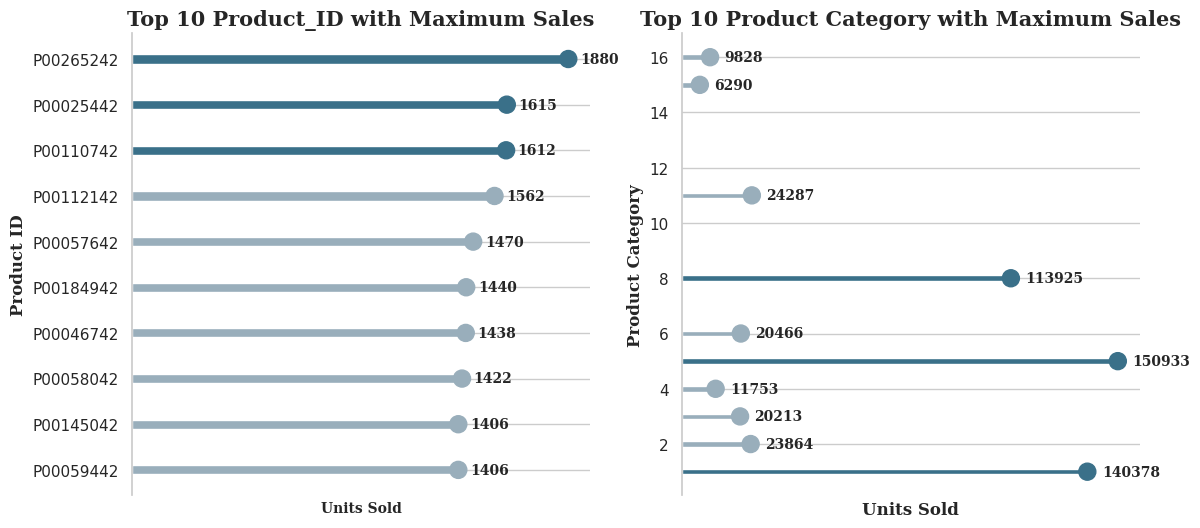

In [115]:
#setting the plot style
fig = plt.figure(figsize = (13,6))
gs = fig.add_gridspec(1,2)

                                        #Top 10 Product_ID Sales

ax = fig.add_subplot(gs[0,0])

temp = df['Product_ID'].value_counts()[0:10]

# reversing the list
temp = temp.iloc[-1:-11:-1]

color_map =  ['#99AEBB' for i in range(7)] + ["#3A7089" for i in range(3)]
#creating the plot
ax.barh(y = temp.index,width = temp.values,height = 0.2,color = color_map)
ax.scatter(y = temp.index, x = temp.values, s = 150 , color = color_map )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(temp.index,temp.values):
    ax.text( x + 50 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

#adding axis labels
ax.set_xlabel('Units Sold',{'font':'serif', 'size':10,'weight':'bold'})
ax.set_ylabel('Product ID',{'font':'serif', 'size':12,'weight':'bold'})

#creating the title
ax.set_title('Top 10 Product_ID with Maximum Sales',
            {'font':'serif', 'size':15,'weight':'bold'})


                                        #Top 10 Product Category Sales
ax = fig.add_subplot(gs[0,1])

temp = df['Product_Category'].value_counts()[0:10]

# reversing the list
temp = temp.iloc[-1:-11:-1]

#creating the plot
ax.barh(y = temp.index,width = temp.values,height = 0.2,color = color_map)
ax.scatter(y = temp.index, x = temp.values, s = 150 , color = color_map )

#removing x-axis
ax.set_xticks([])

#adding label to each bar
for y,x in zip(temp.index,temp.values):
    ax.text( x + 5000 , y , x,{'font':'serif', 'size':10,'weight':'bold'},va='center')

#removing the axis lines
for s in ['top','bottom','right']:
    ax.spines[s].set_visible(False)

#adding axis labels
ax.set_xlabel('Units Sold',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Product Category',{'font':'serif', 'size':12,'weight':'bold'})

#creating the title
ax.set_title('Top 10 Product Category with Maximum Sales',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

**Observations**

* Leading Products - Walmart's Black Friday sales highlight a diverse range of top-selling products, each showing relatively consistent sales figures. This diversity implies that Walmart caters to various customer preferences, resulting in widespread popularity across different product types.

* Dominant Categories - Categories 5, 1, and 8 emerge as standout performers, collectively contributing to almost 75% of the overall sales. This strong preference among customers signifies the significant impact and popularity of products within these specific categories.

**Top 10 Occupations of Customers During Black Friday Sales**

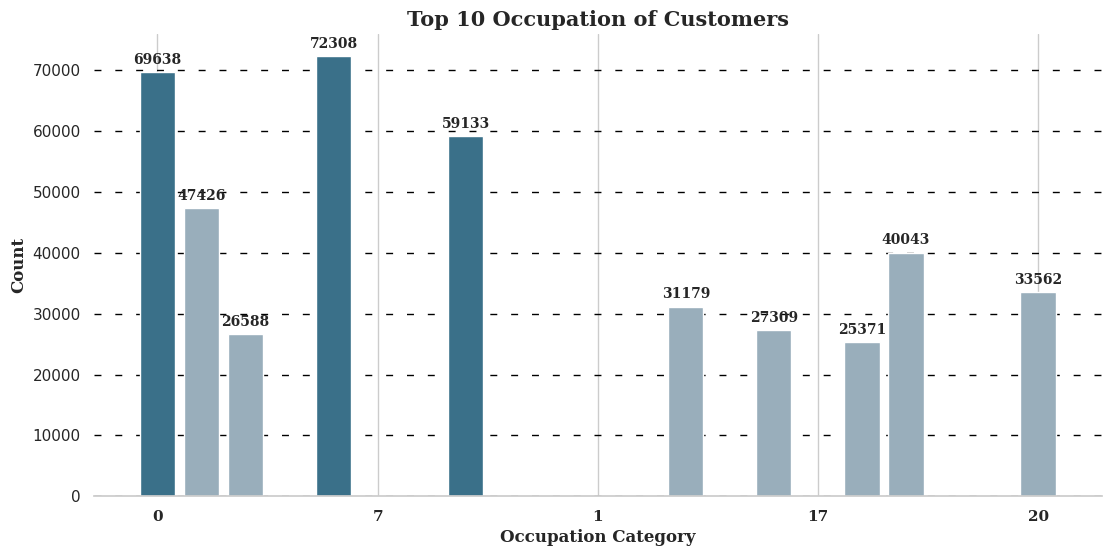

In [116]:
temp = df['Occupation'].value_counts()[0:10]

#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))

color_map =  ["#3A7089" for i in range(3)] +  ['#99AEBB' for i in range(7)]

#creating the plot
ax.bar(temp.index,temp.values,color = color_map,zorder = 2)

#adding valuecounts
for x,y in zip(temp.index,temp.values):
    ax.text(x, y + 2000, y,{'font':'serif', 'size':10,'weight':'bold'},va='center',ha = 'center')

#setting grid style
ax.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))

#customizing the axis labels
ax.set_xticklabels(temp.index,fontweight = 'bold',fontfamily='serif')
ax.set_xlabel('Occupation Category',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Count',{'font':'serif', 'size':12,'weight':'bold'})

#removing the axis lines

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 Occupation of Customers',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()

**Observations**
A substantial contribution to total purchases, approximately 37%, comes from customers in Occupation categories 4, 0, and 7. This implies a notable demand for Walmart products or services within these occupation groups or suggests that individuals in these categories have a higher disposable income, allowing them to make substantial purchases during the Black Friday event.

**Bivariate Analysis**
* Investigating Buying Trends: Boxplots of Purchase Amount Across various Variables


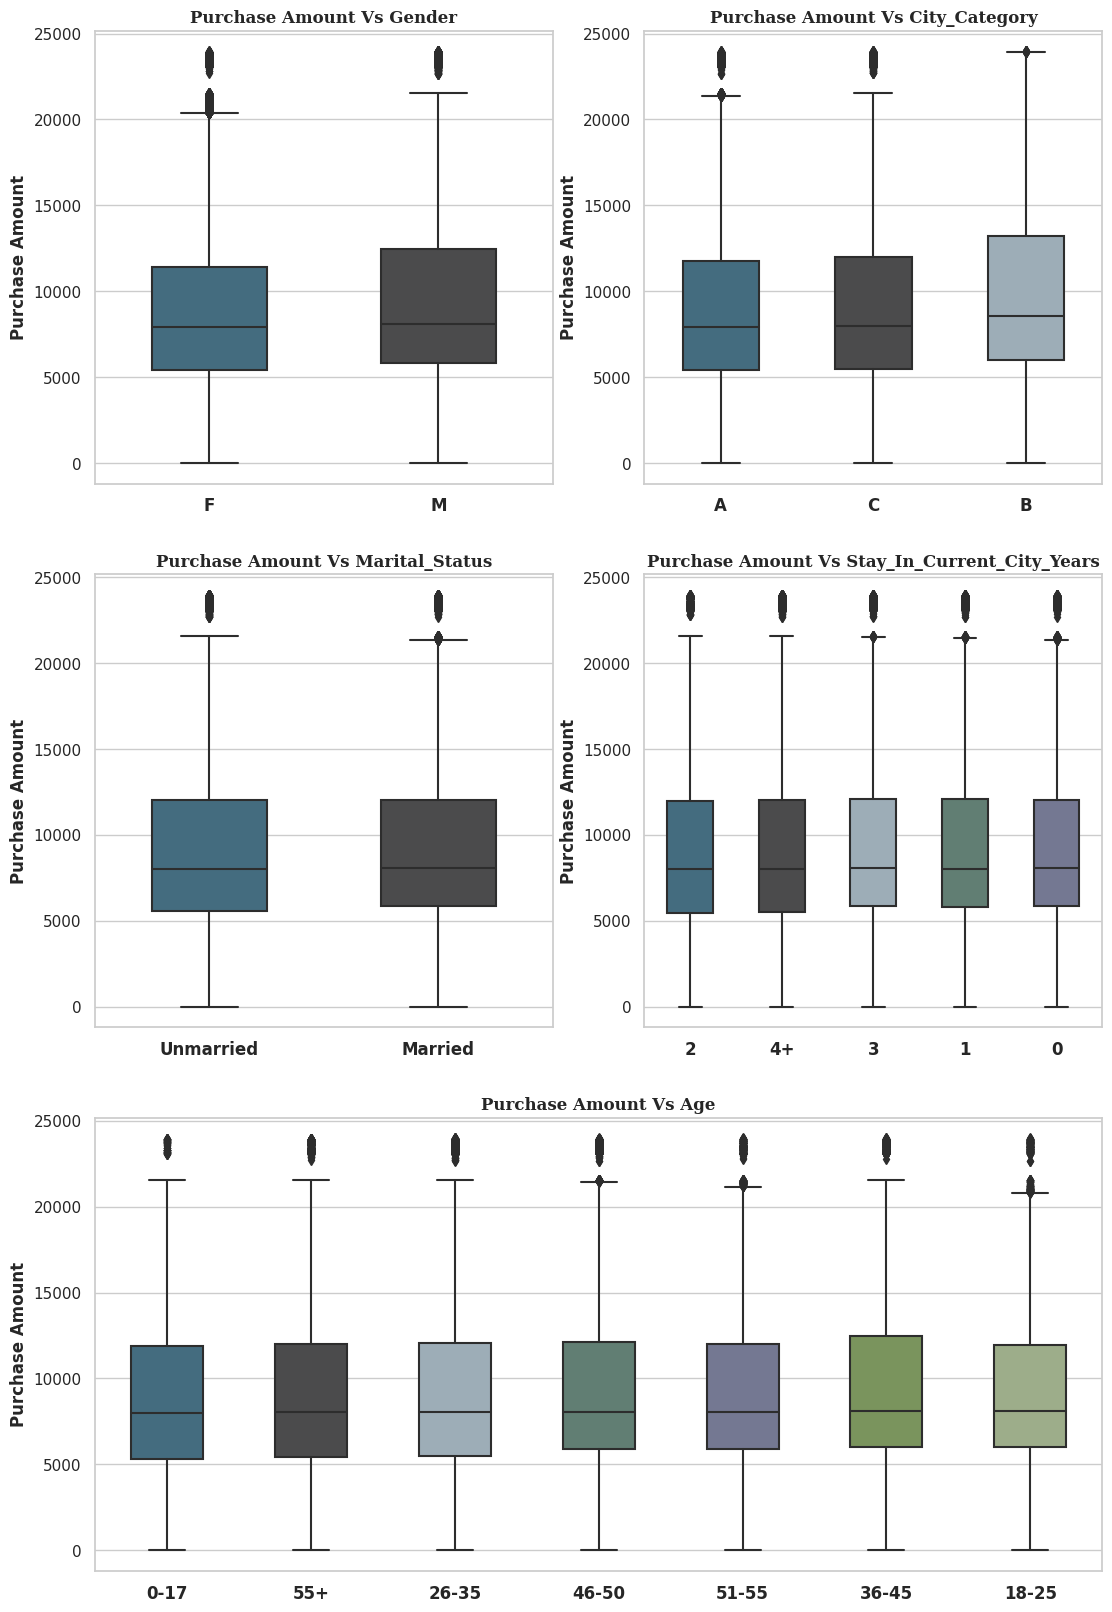

In [120]:
#setting the plot style
fig = plt.figure(figsize = (13,20))
gs = fig.add_gridspec(3,2)

for i,j,k in [(0,0,'Gender'),(0,1,'City_Category'),(1,0,'Marital_Status'),(1,1,'Stay_In_Current_City_Years'),(2,1,'Age')]:

    #plot position
    if i <= 1:
        ax0 = fig.add_subplot(gs[i,j])
    else:
        ax0 = fig.add_subplot(gs[i,:])

    #plot
    color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
    sns.boxplot(data = df, x = k, y  = 'Purchase' ,ax = ax0,width = 0.5, palette =color_map)

    #plot title
    ax0.set_title(f'Purchase Amount Vs {k}',{'font':'serif', 'size':12,'weight':'bold'})

    #customizing axis
    ax0.set_xticklabels(df[k].unique(),fontweight = 'bold',fontsize = 12)
    ax0.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')


plt.show()

**Observations**

Among the various variables examined, it is notable that the purchase amount exhibits a consistent stability irrespective of the variable in question. The data reveals that the median purchase amount consistently stays around 8,000 USD, regardless of the specific variable being scrutinized.

**Gender VS Purchase Amount:** Data Visualization

In [121]:
#creating a df for purchase amount vs gender
temp = df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

#renaming the gender
temp['Gender'] = temp['Gender'].replace({'F':'Female','M':'Male'})

temp

,Gender,sum,count,sum_in_billions,%sum,per_purchase
0,Female,1186232642,135809,1.19,0.233,8735.0
1,Male,3909580100,414259,3.91,0.767,9438.0


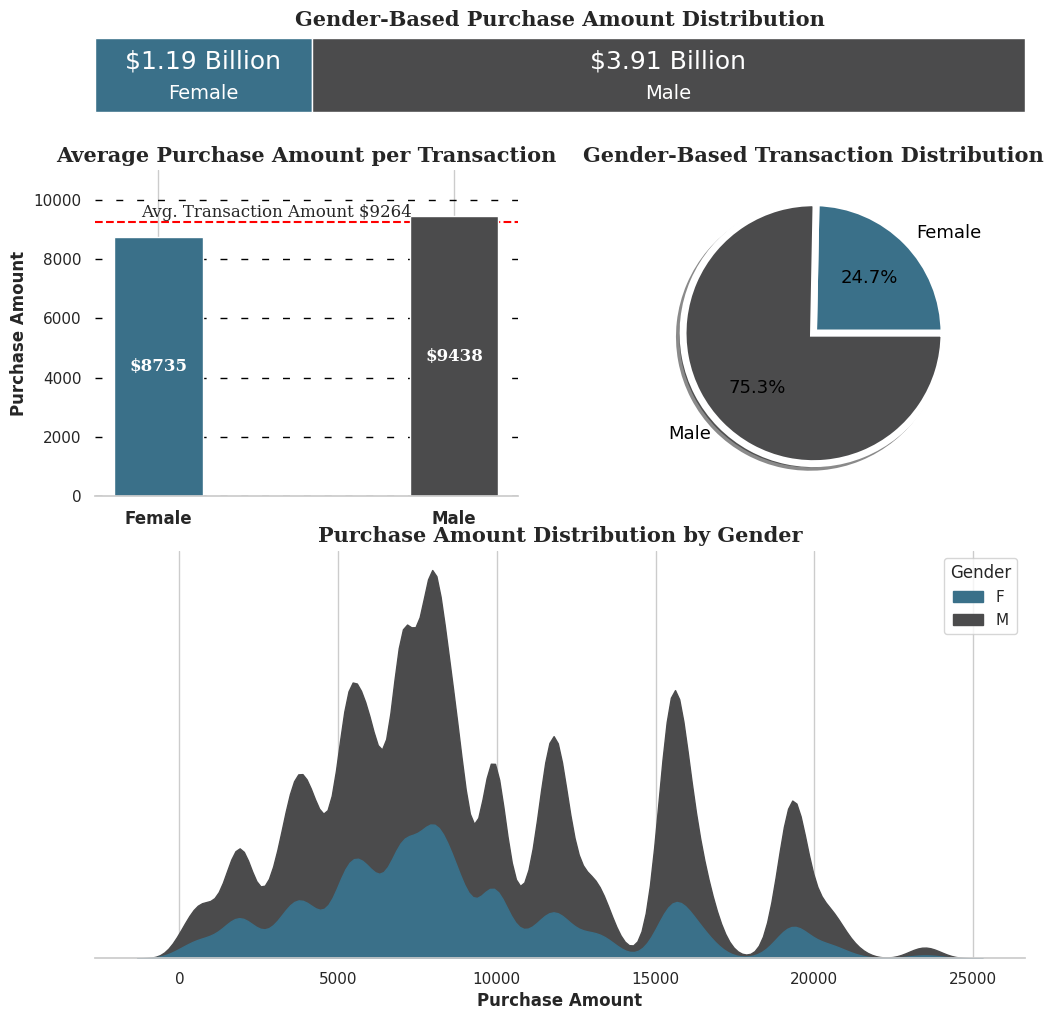

In [123]:
#setting the plot style
fig = plt.figure(figsize = (12,12))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0,:])

#plotting the visual
ax.barh(temp.loc[0,'Gender'],width = temp.loc[0,'%sum'],color = "#3A7089",label = 'Female')
ax.barh(temp.loc[0,'Gender'],width = temp.loc[1,'%sum'],left =temp.loc[0,'%sum'], color =  "#4b4b4c",label = 'Male' )

#inserting the text
txt = [0.0] #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt[0],0.15,f"${temp.loc[i,'sum_in_billions']} Billion",
           va = 'center', ha='center',fontsize=18, color='white')

    #for gender
    ax.text(temp.loc[i,'%sum']/2 + txt[0],- 0.20 ,f"{temp.loc[i,'Gender']}",
           va = 'center', ha='center',fontsize=14, color='white')

    txt += temp.loc[i,'%sum']

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Gender-Based Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction

ax1 = fig.add_subplot(gs[1,0])

color_map = ["#3A7089", "#4b4b4c"]

#plotting the visual
ax1.bar(temp['Gender'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Gender'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Gender'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for gender disribution
ax2 = fig.add_subplot(gs[1,1])

color_map = ["#3A7089", "#4b4b4c"]
ax2.pie(temp['count'],labels = temp['Gender'],autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax2.set_title('Gender-Based Transaction Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])

#plotting the kdeplot
sns.kdeplot(data = df, x = 'Purchase', hue = 'Gender', palette = color_map,fill = True, alpha = 1,ax = ax3)

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Gender',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()


**Insights:**

1. Comparison of Total Sales and Transactions:
The aggregate purchase amount and transaction count for male customers exceeded those of female customers by over threefold. This suggests that male customers had a more pronounced influence on Black Friday sales.

2. Average Transaction Value:
The average purchase amount per transaction marginally favored male customers over female customers, with values of \$9438 and \$8735, respectively.

3. Purchase Amount Distribution:
The distribution of purchase amounts for both genders deviates from a normal distribution, as illustrated above.

**Constructing Confidence Intervals: Estimating Average Purchase Amount per Transaction**

**Step 1 -** Constructing the Central Limit Theorem (CLT) Curve
As demonstrated above, the distribution of purchase amounts does not follow a normal distribution. Therefore, the application of the Central Limit Theorem is necessary. The CLT asserts that the distribution of sample means will approximate a normal distribution, regardless of the original population distribution.

**Step 2 -** Creating Confidence Intervals
Following the construction of the CLT curve, we will generate confidence intervals to predict the population mean at confidence levels of 99%, 95%, and 90%. Please note that various sample sizes, namely [100, 1000, 5000, 50000], will be utilized.

In [124]:
#creating a function to calculate confidence interval

def confidence_interval(data,ci):
    #converting the list to series
    l_ci = (100-ci)/2
    u_ci = (100+ci)/2

    #calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[l_ci,u_ci]).round(0)

    return interval

In [127]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames for each gender
    df_male = df.loc[df['Gender'] == 'M','Purchase']
    df_female = df.loc[df['Gender'] == 'F','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}

    for i,x,y in sample_sizes:
        male_means = [] #list for collecting the means of male sample
        female_means = [] #list for collecting the means of female sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            male_bootstrapped_samples = np.random.choice(df_male,size = i)
            female_bootstrapped_samples = np.random.choice(df_female,size = i)

            #calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            #appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for male and female
        sns.kdeplot(data = temp_df,x = 'male_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_df,x = 'female_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return male_samples,female_samples

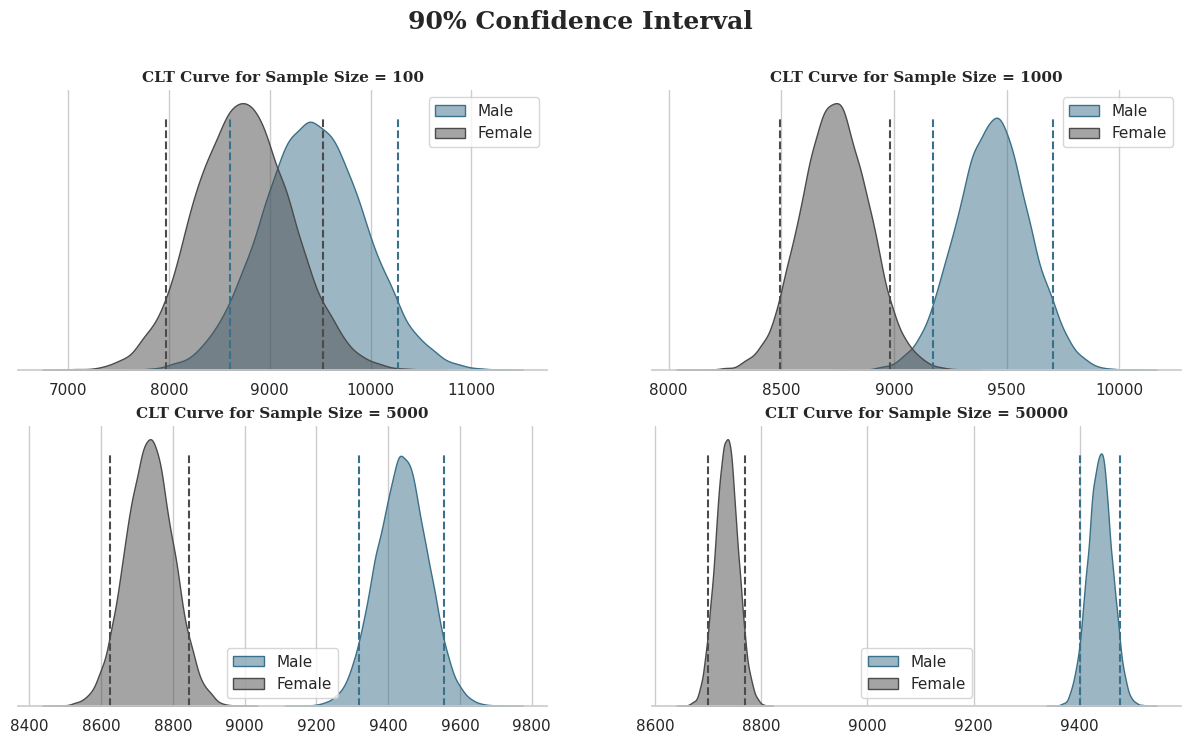

In [128]:
m_samp_90,f_samp_90 = plot(90)

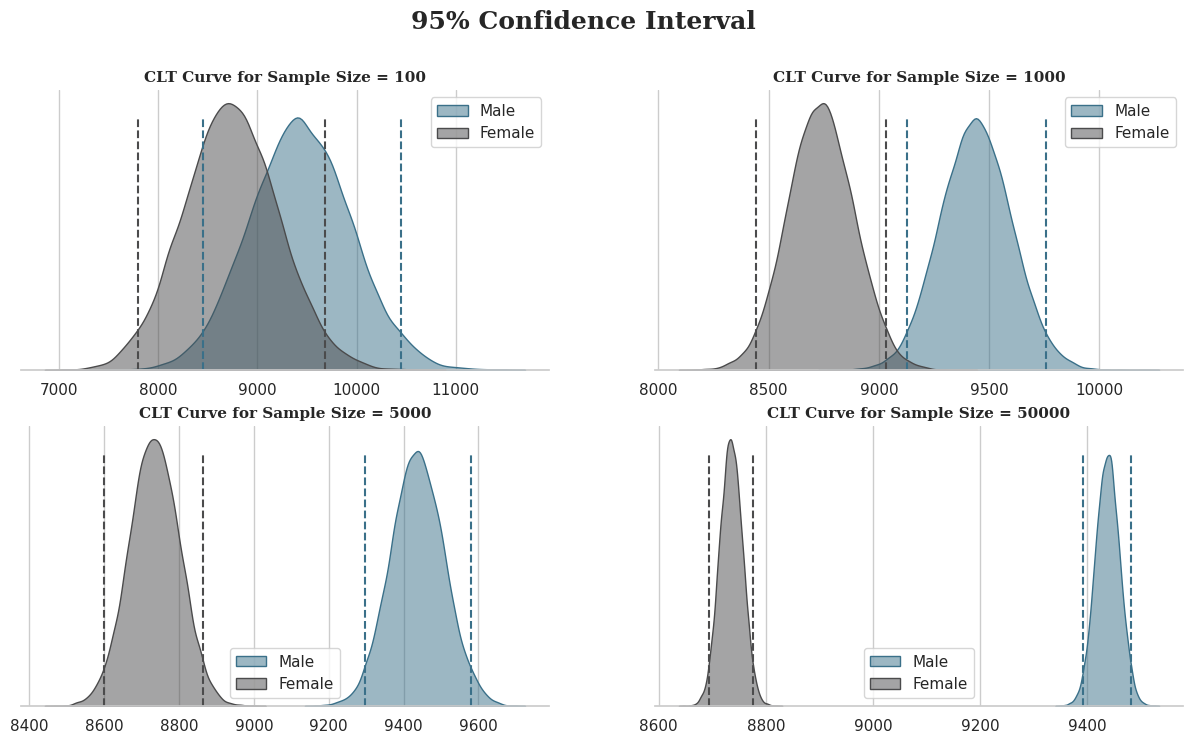

In [129]:
m_samp_95,f_samp_95 = plot(95)

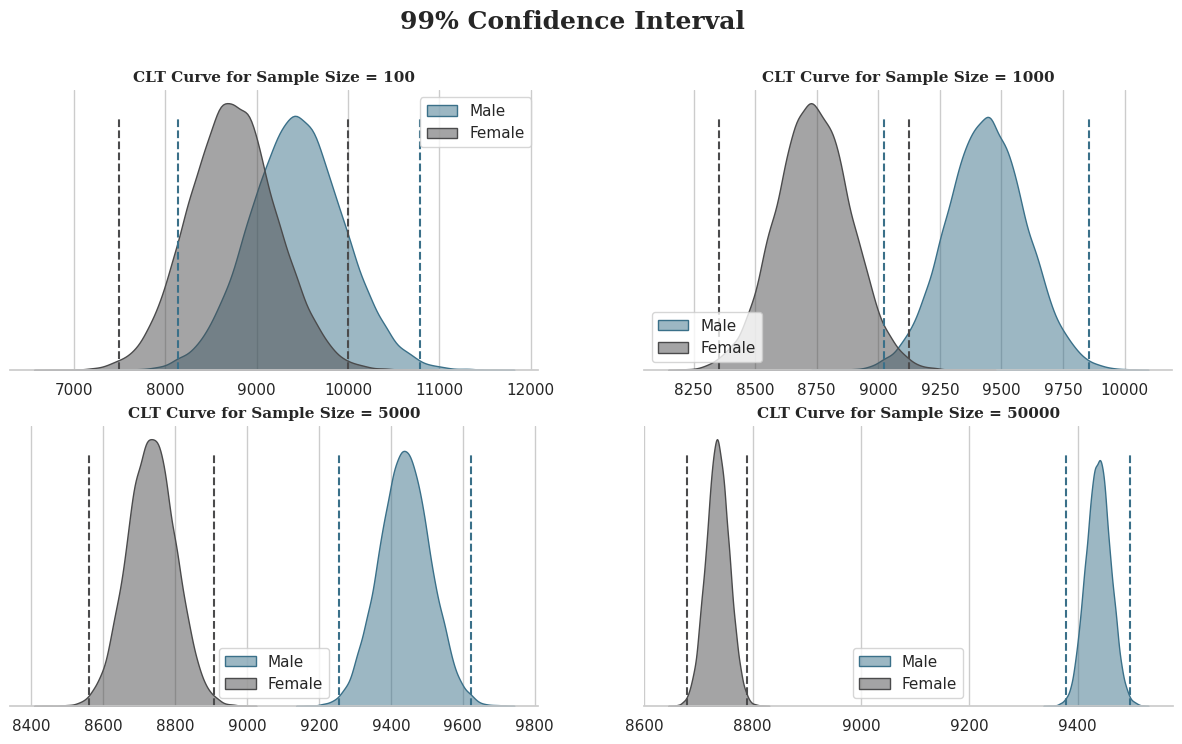

In [130]:
m_samp_99,f_samp_99 = plot(99)

**Are the confidence intervals for average spending by males and females overlappi**ng?

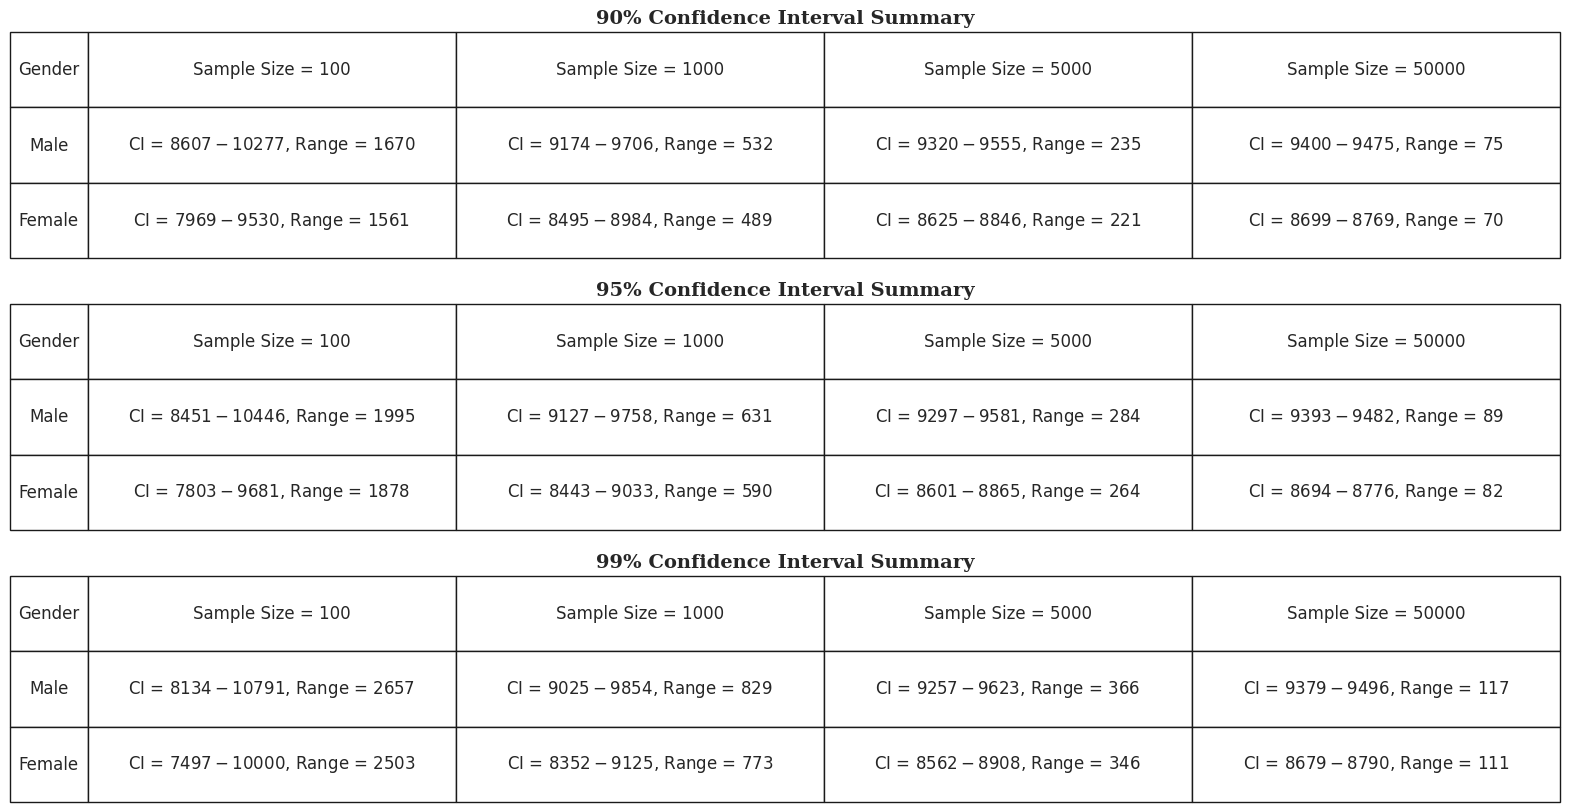

In [131]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))

for ax, (m_samp, f_samp, cl) in zip(axes, [(m_samp_90, f_samp_90, 90), (m_samp_95, f_samp_95, 95), (m_samp_99, f_samp_99, 99)]):
    m_ci = ['Male']
    f_ci = ['Female']

    for m in m_samp:
        m_range = confidence_interval(m_samp[m], cl)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

    for f in f_samp:
        f_range = confidence_interval(f_samp[f], cl)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")

    # Plotting the summary
    ci_info = [m_ci, f_ci]

    table = ax.table(cellText=ci_info, cellLoc='center',
                     colLabels=['Gender', 'Sample Size = 100', 'Sample Size = 1000', 'Sample Size = 5000', 'Sample Size = 50000'],
                     colLoc='center', colWidths=[0.05, 0.2375, 0.2375, 0.2375, 0.2375], bbox=[0, 0, 1, 1])

    table.set_fontsize(13)

    ax.axis('off')
    ax.set_title(f"{cl}% Confidence Interval Summary", {'font': 'serif', 'size': 14, 'weight': 'bold'})

plt.show()

**Insights:**

**1. Significance of Sample Size:**
This analysis underscores the pivotal role of sample size in estimating population parameters. It implies that larger sample sizes result in narrower and more precise confidence intervals, enhancing the reliability of insights and estimates in a business context.

**2. Observations on Confidence Intervals:**
The analysis reveals that, with the exception of the sample size of 100, confidence intervals do not overlap as sample sizes increase. This signifies a statistically significant difference in the average spending per transaction for men and women within the specified samples.

**3. Estimating Population Averages:**
With 95% confidence, we estimate the true population average for males to fall between \$9,393 and \$9,483, and for females, between \$8,692 and \$8,777.

**4. Gender Disparity in Spending:**
Men consistently exhibit a higher average spending per transaction than women, as evidenced by the consistently higher upper bounds of confidence intervals for men across varying sample sizes.

**5. Leveraging Conclusions for Walmart's Enhancement:**

5.1. Segmentation Opportunities:   Walmart can capitalize on the distinct spending behaviors of male and female customers by implementing targeted marketing campaigns, introducing loyalty programs, or offering product bundles. This strategic approach has the potential to optimize revenue from each customer segment.

5.2. Pricing Strategies:   In light of the data on average spending per transaction by gender, Walmart may consider adjusting pricing or discount strategies to encourage higher spending among male customers while ensuring competitive pricing for products tailored to female customers.

**Note:**
For the ongoing analysis, we will maintain a 95% Confidence Level.





**Marital Status VS Purchase Amount:** Data Visualization

In [132]:
#creating a df for purchase amount vs marital status
temp = df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,Unmarried,3008927447,324731,3.01,0.59,9266.0
1,Married,2086885295,225337,2.09,0.41,9261.0


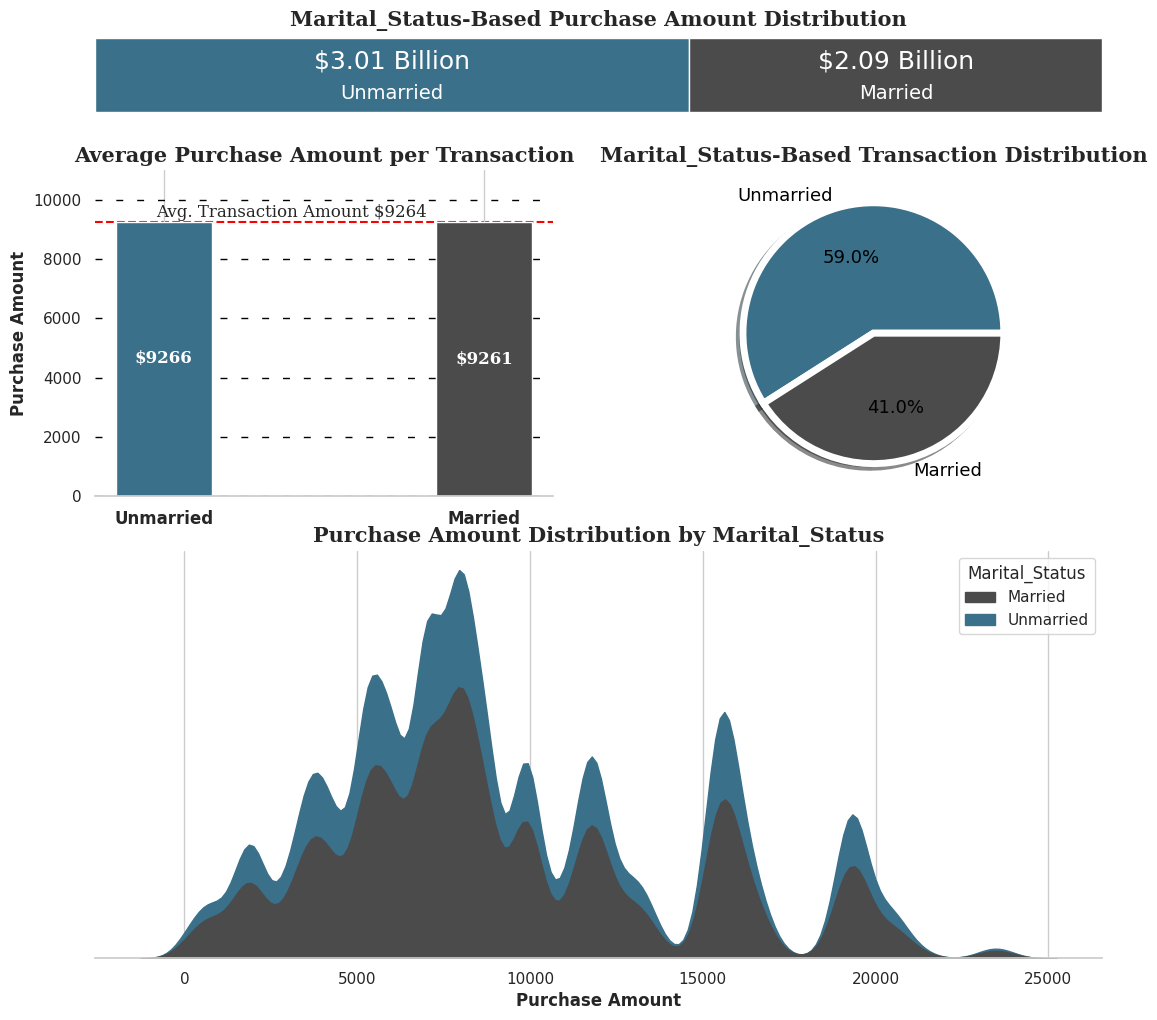

In [134]:
#setting the plot style
fig = plt.figure(figsize = (13,12))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0,:])

#plotting the visual
ax.barh(temp.loc[0,'Marital_Status'],width = temp.loc[0,'%sum'],color = "#3A7089",label = 'Unmarried')
ax.barh(temp.loc[0,'Marital_Status'],width = temp.loc[1,'%sum'],left =temp.loc[0,'%sum'], color =  "#4b4b4c",label = 'Married')

#inserting the text
txt = [0.0] #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt[0],0.15,f"${temp.loc[i,'sum_in_billions']} Billion",
           va = 'center', ha='center',fontsize=18, color='white')

    #for marital status
    ax.text(temp.loc[i,'%sum']/2 + txt[0],- 0.20 ,f"{temp.loc[i,'Marital_Status']}",
           va = 'center', ha='center',fontsize=14, color='white')

    txt += temp.loc[i,'%sum']

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Marital_Status-Based Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction

ax1 = fig.add_subplot(gs[1,0])

color_map = ["#3A7089", "#4b4b4c"]

#plotting the visual
ax1.bar(temp['Marital_Status'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Marital_Status'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Marital_Status'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for Marital_Status disribution
ax2 = fig.add_subplot(gs[1,1])

color_map = ["#3A7089", "#4b4b4c"]
ax2.pie(temp['count'],labels = temp['Marital_Status'],autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax2.set_title('Marital_Status-Based Transaction Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])
color_map = [ "#4b4b4c","#3A7089"]

#plotting the kdeplot
sns.kdeplot(data = df, x = 'Purchase', hue = 'Marital_Status', palette = color_map,fill = True, alpha = 1,
            ax = ax3,hue_order = ['Married','Unmarried'])

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Marital_Status',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

**Insights:**

1. Comparative Analysis of Total Sales and Transactions:
Unmarried customers contributed to over 20% more total purchase amount and transactions compared to married customers, signifying their substantial impact on Black Friday sales.
2. Average Transaction Value:
The average purchase amount per transaction was nearly identical for married and unmarried customers, with values of \$9261 and \$9266, respectively.
3. Purchase Amount Distribution:
The purchase amount distribution for both married and unmarried customers deviates from a normal distribution, as observed in the analysis above.


**Constructing Confidence Intervals: Estimating Average Purchase Amount per Transaction**

**Step 1 -** Constructing Central Limit Theorem (CLT) Curve
As evident from the above observations, the distribution of purchase amounts does not follow a normal pattern. Consequently, we employ the Central Limit Theorem, which posits that the distribution of sample means will approximate a normal distribution, irrespective of the underlying population distribution.

**Step 2 -** Building Confidence Intervals

Following the establishment of the CLT curve, we will generate a confidence interval to predict the population mean at a 95% confidence level.
Note: Different sample sizes of [100, 1000, 5000, 50000] will be utilized for this purpose.

In [137]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (12,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames
    df_married = df.loc[df['Marital_Status'] == 'Married','Purchase']
    df_unmarried = df.loc[df['Marital_Status'] == 'Unmarried','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    married_samples = {}
    unmarried_samples = {}

    for i,x,y in sample_sizes:
        married_means = [] #list for collecting the means of married sample
        unmarried_means = [] #list for collecting the means of unmarried sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            married_bootstrapped_samples = np.random.choice(df_married,size = i)
            unmarried_bootstrapped_samples = np.random.choice(df_unmarried,size = i)

            #calculating mean of those samples
            married_sample_mean = np.mean(married_bootstrapped_samples)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped_samples)

            #appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)

        #storing the above sample generated
        married_samples[f'{ci}%_{i}'] = married_means
        unmarried_samples[f'{ci}%_{i}'] = unmarried_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'married_means':married_means,'unmarried_means':unmarried_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for married and unmarried
        sns.kdeplot(data = temp_df,x = 'married_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Married')
        sns.kdeplot(data = temp_df,x = 'unmarried_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Unmarried')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(married_means,ci)
        u_range = confidence_interval(unmarried_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in u_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return married_samples,unmarried_samples

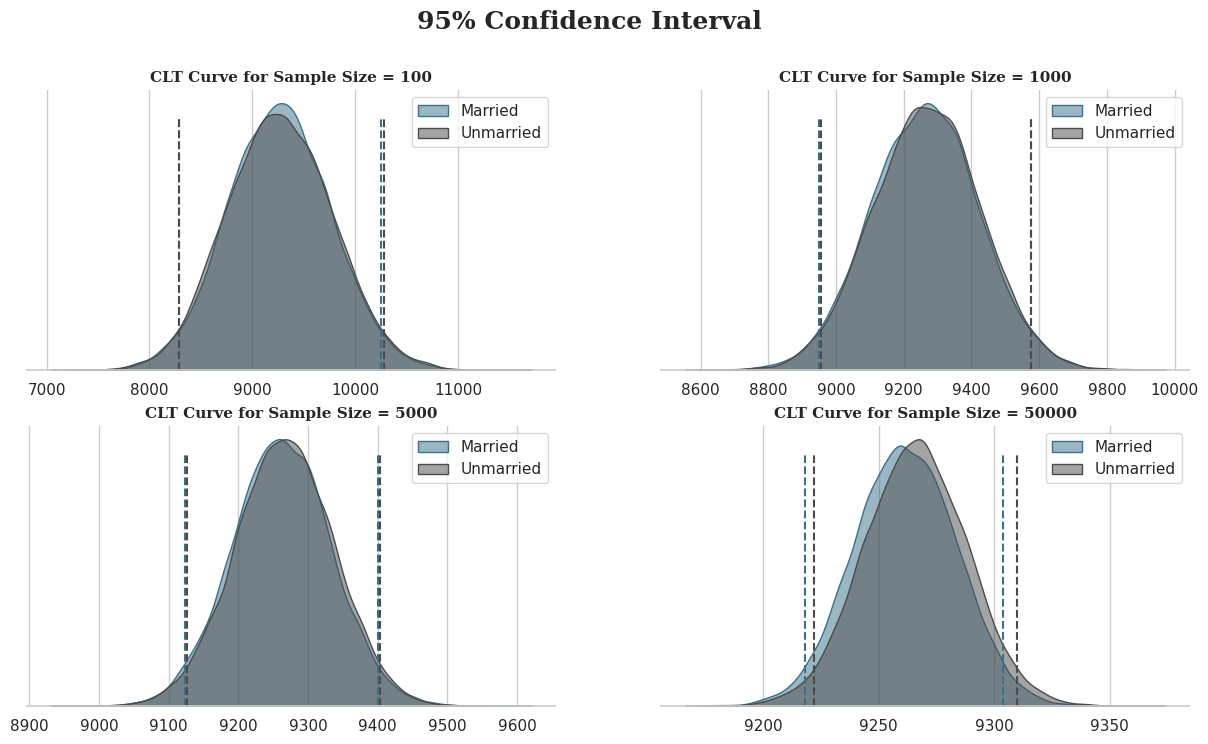

In [136]:
m_samp_95,u_samp_95 = plot(95)

**Are confidence intervals of average married and unmarried customer spending overlapping?**

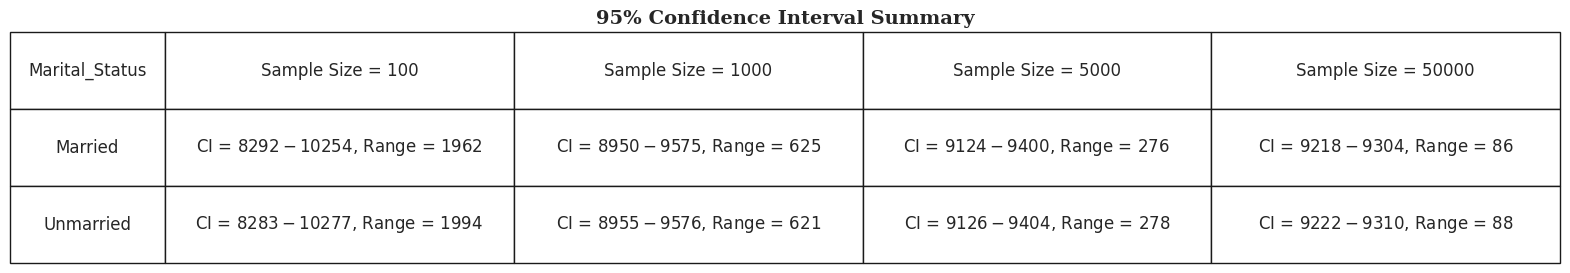

In [138]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,3))

#list for collecting ci for given cl
m_ci = ['Married']
u_ci = ['Unmarried']

#finding ci for each sample size (married)
for m in m_samp_95:
    m_range = confidence_interval(m_samp_95[m],95)
    m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

#finding ci for each sample size (unmarried)
for u in u_samp_95:
    u_range = confidence_interval(u_samp_95[u],95)
    u_ci.append(f"CI = ${u_range[0]:.0f} - ${u_range[1]:.0f}, Range = {(u_range[1] - u_range[0]):.0f}")

                                    #plotting the summary
#contents of the table
ci_info = [m_ci,u_ci]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Marital_Status','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

**Insights**
1. Sample Size:
The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.
2. Confidence Intervals:
From the above analysis, we can see that the confidence interval overlap for all the sample sizes. This means that there is no statistically significant difference between the average spending per transaction for married and unmarried customers within the given samples.
3. Population Average:
We are 95% confident that the true population average for married customers falls between \$9,217 and \$9,305, and for unmarried customers, it falls between \$9,222 and \$9,311.
4. Both the customers spend equal:
The overlapping confidence intervals of average spending for married and unmarried customers indicate that both married and unmarried customers spend a similar amount per transaction. This implies a resemblance in spending behavior between the two groups.
**5. How can Walmart leverage this conclusion to make changes or improvements?**
5.1. Marketing Resources:
Walmart may not need to allocate marketing resources specifically targeting one group over the other. Instead, they can focus on broader marketing strategies that appeal to both groups.

**Customer Age VS Purchase Amount:** Data Visualization

In [139]:
#creating a df for purchase amount vs age group
temp = df.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Age,sum,count,sum_in_billions,%sum,per_purchase
0,0-17,134913183,15102,0.13,0.026,8933.0
1,18-25,913848675,99660,0.91,0.179,9170.0
2,26-35,2031770578,219587,2.03,0.399,9253.0
3,36-45,1026569884,110013,1.03,0.201,9331.0
4,46-50,420843403,45701,0.42,0.083,9209.0
5,51-55,367099644,38501,0.37,0.072,9535.0
6,55+,200767375,21504,0.20,0.039,9336.0


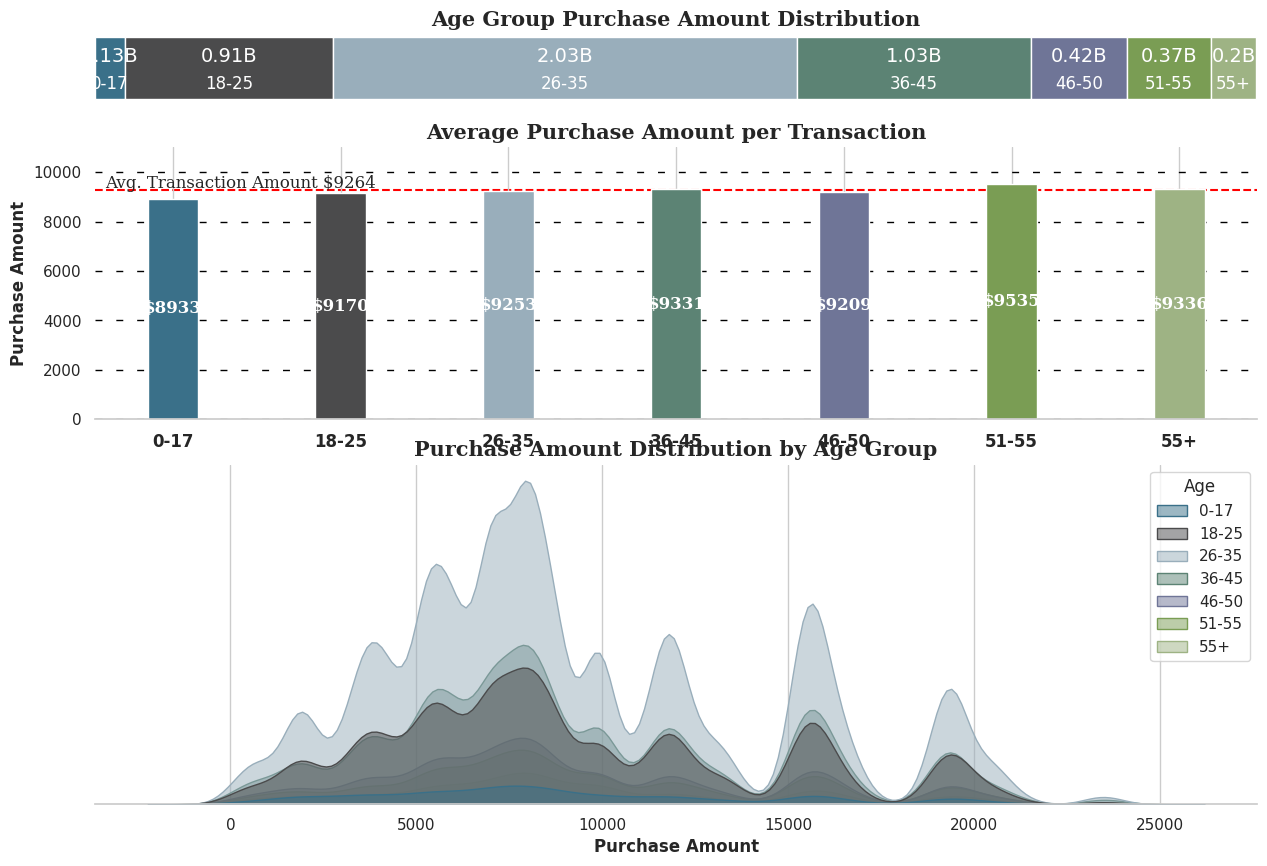

In [141]:
#setting the plot style
fig = plt.figure(figsize = (15,10))
gs = fig.add_gridspec(3,1,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0])
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']

#plotting the visual
left = 0

for i in temp.index:
    ax.barh(temp.loc[0,'Age'],width = temp.loc[i,'%sum'],left = left,color = color_map[i],label = temp.loc[i,'Age'])
    left += temp.loc[i,'%sum']

#inserting the text
txt = 0.0 #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt,0.15,f"{temp.loc[i,'sum_in_billions']}B",
           va = 'center', ha='center',fontsize=14, color='white')

    #for age grp
    ax.text(temp.loc[i,'%sum']/2 + txt,- 0.20 ,f"{temp.loc[i,'Age']}",
           va = 'center', ha='center',fontsize=12, color='white')

    txt += temp.loc[i,'%sum']

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Age Group Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction

ax1 = fig.add_subplot(gs[1])


#plotting the visual
ax1.bar(temp['Age'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Age'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Age'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})


                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])

#plotting the kdeplot
sns.kdeplot(data = df, x = 'Purchase', hue = 'Age', palette = color_map,fill = True, alpha = 0.5,
            ax = ax3)

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Age Group',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()


**Insights:**

* Total Sales Analysis:

The age range from 26 to 45 contributes to nearly 60% of the total sales, indicating that Walmart's Black Friday sales are particularly popular among individuals within this age bracket.

The age group 0-17 exhibits the lowest sales percentage at 2.6%, which is expected due to limited purchasing power in this demographic. Tailoring strategies to understand their preferences and offering special incentives could prove advantageous, especially for cultivating customer loyalty as they mature.

* Average Transaction Value:

While there is not a substantial variance in per-purchase spending across age groups, the 51-55 age group stands out with a relatively low sales percentage (7.2%) coupled with the highest per-purchase spending at $9,535. Walmart may explore strategies to attract and retain this demographic known for higher spending.

Distribution of Purchase Amount
The purchase amount across all age groups is depicted as non-normally distributed in the visualization above.

**Constructing Confidence Intervals: Estimating Average Purchase Amount per Transaction**

**Step 1 -** Constructing CLT Curve
As observed earlier, the distribution of purchase amounts does not follow a normal pattern. Therefore, the application of the Central Limit Theorem is necessary. This theorem asserts that the distribution of sample means will approximate a normal distribution, regardless of the original population distribution.

**Step 2 -** Building Confidence Interval

Following the construction of the CLT curve, we will establish a confidence interval to predict the population mean at a 95% confidence level.

**Note -** Various sample sizes, including 100, 1000, 5000, and 50000, will be utilized in this process.

In [150]:
#defining a function for plotting the visual for given confidence interval

def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,15))
    gs = fig.add_gridspec(4,1)

    #creating separate data frames

    df_1 = df.loc[df['Age'] == '0-17','Purchase']
    df_2 = df.loc[df['Age'] == '18-25','Purchase']
    df_3 = df.loc[df['Age'] == '26-35','Purchase']
    df_4 = df.loc[df['Age'] == '36-45','Purchase']
    df_5 = df.loc[df['Age'] == '46-50','Purchase']
    df_6 = df.loc[df['Age'] == '51-55','Purchase']
    df_7 = df.loc[df['Age'] == '55+','Purchase']


    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0),(1000,1),(5000,2),(50000,3)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    samples1,samples2,samples3,samples4,samples5,samples6,samples7 = {},{},{},{},{},{},{}

    for i,x in sample_sizes:
        l1,l2,l3,l4,l5,l6,l7 = [],[],[],[],[],[],[]

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            bootstrapped_samples_1 = np.random.choice(df_1,size = i)
            bootstrapped_samples_2 = np.random.choice(df_2,size = i)
            bootstrapped_samples_3 = np.random.choice(df_3,size = i)
            bootstrapped_samples_4 = np.random.choice(df_4,size = i)
            bootstrapped_samples_5 = np.random.choice(df_5,size = i)
            bootstrapped_samples_6 = np.random.choice(df_6,size = i)
            bootstrapped_samples_7 = np.random.choice(df_7,size = i)

            #calculating mean of those samples
            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)
            sample_mean_6 = np.mean(bootstrapped_samples_6)
            sample_mean_7 = np.mean(bootstrapped_samples_7)

            #appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        #storing the above sample generated
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7


        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'0-17':l1,'18-25':l2,'26-35':l3,'36-45':l4,'46-50':l5,'51-55':l6,'55+':l7})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x])

        #plots
        for p,q in [('#3A7089', '0-17'),('#4b4b4c', '18-25'),('#99AEBB', '26-35'),('#5C8374', '36-45'),('#6F7597', '46-50'),
                 ('#7A9D54', '51-55'),('#9EB384', '55+')]:

            sns.kdeplot(data = temp_df,x = q,color =p ,fill = True, alpha = 0.5,ax = ax,label = q)


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return samples1,samples2,samples3,samples4,samples5,samples6,samples7

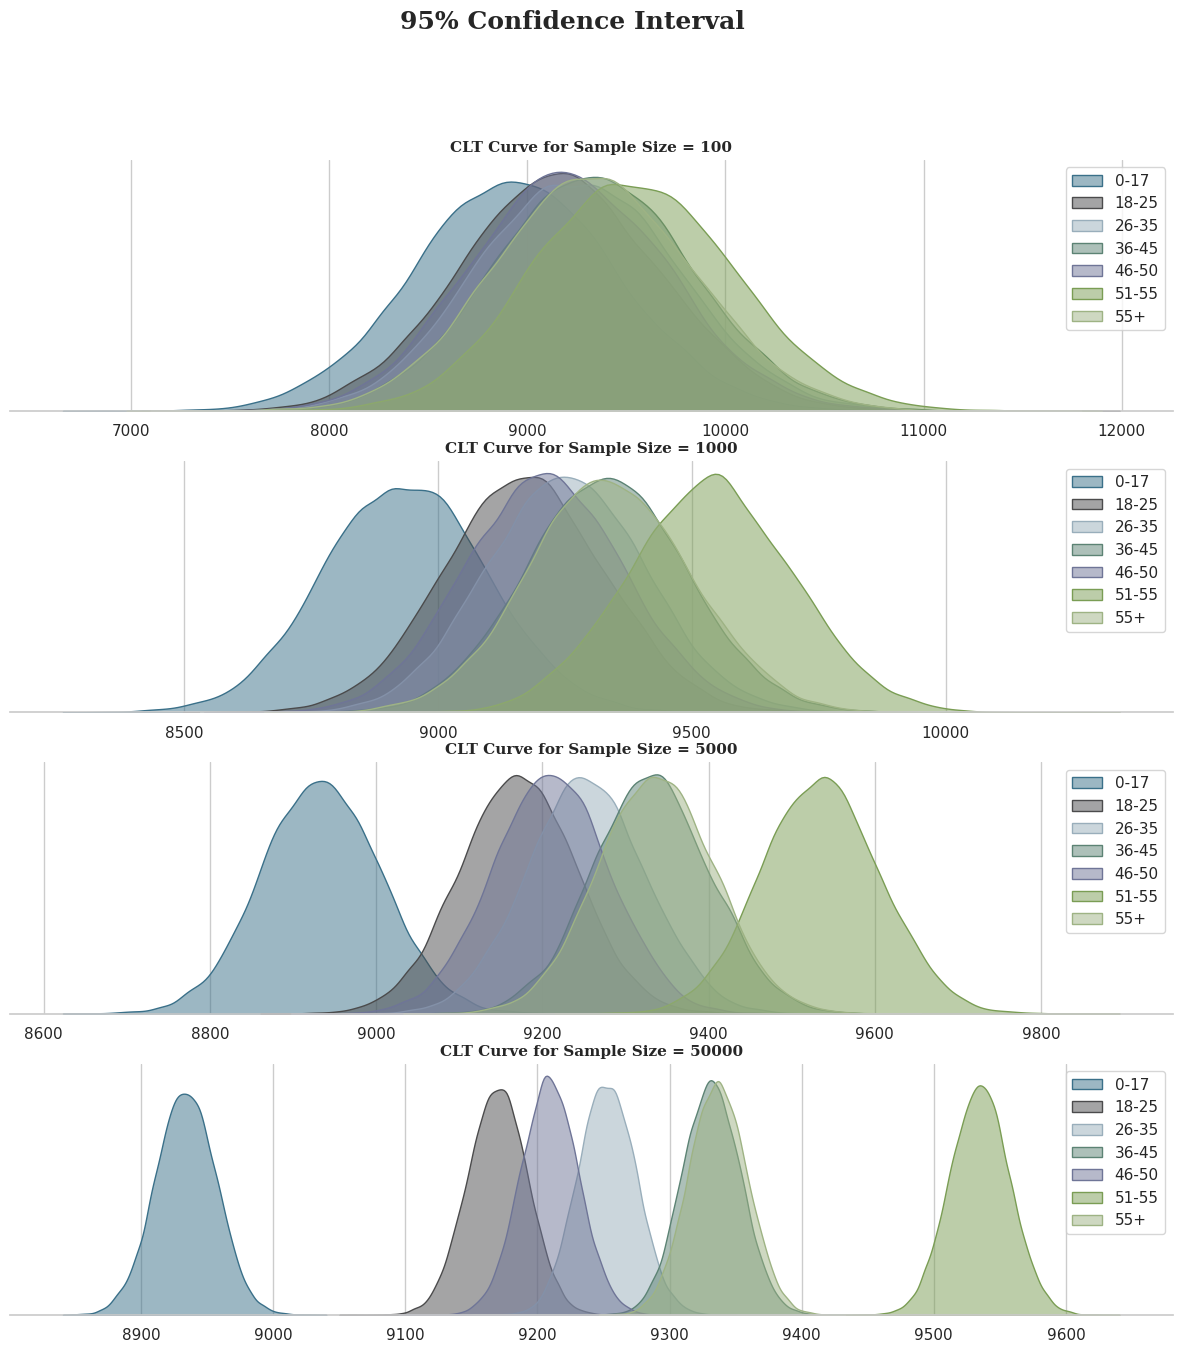

In [151]:
samples1,samples2,samples3,samples4,samples5,samples6,samples7 = plot(95)

**Are confidence intervals of customer's age-group spending overlapping?**

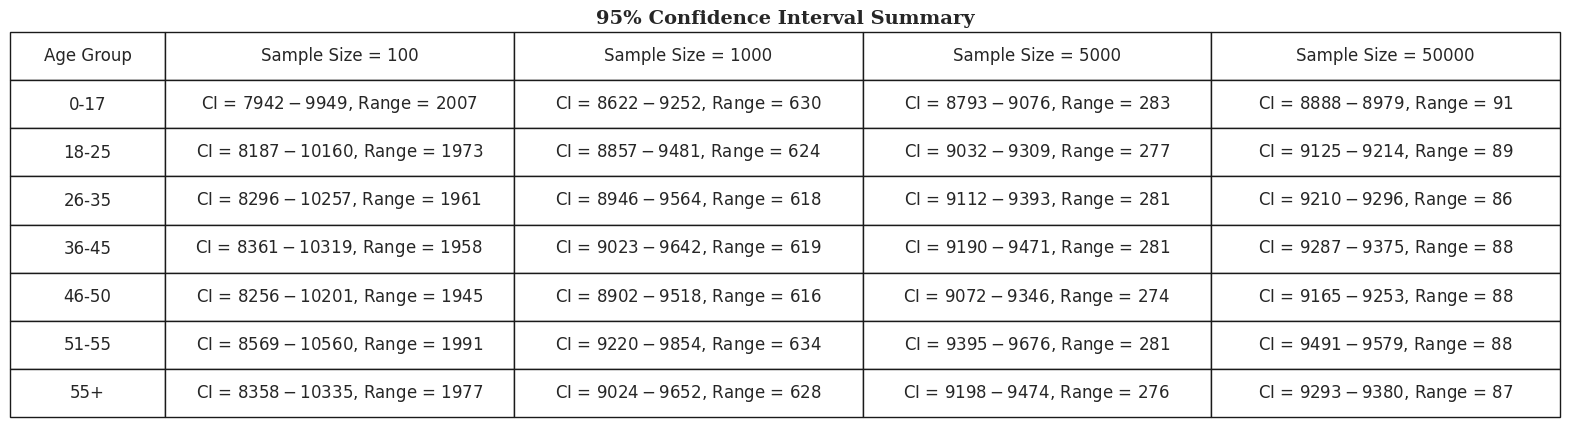

In [152]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,5))

#list for collecting ci for given cl
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']

#finding ci for each sample size
#samples = [samples1,samples2,samples3,samples4,samples5,samples6,samples7]

samples = [(samples1,ci_1),(samples2,ci_2),(samples3,ci_3),(samples4,ci_4),(samples5,ci_5),(samples6,ci_6),(samples7,ci_7)]

for s,c in samples:
    for i in s:
        s_range = confidence_interval(s[i],95)
        c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")


                                    #plotting the summary
#contents of the table
ci_info = [ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Age Group','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

**Insights**

1. Importance of Sample Size

The analysis underscores the significance of sample size when estimating population parameters. It indicates that as the sample size grows, the confidence intervals become more focused and accurate. In a business context, this implies that utilizing larger sample sizes can yield more dependable insights and estimations.
2. Confidence Intervals and Spending Trends among Customers

In the aforementioned analysis, we observe that confidence intervals overlap for certain age groups. We can categorize average spending into the following age groups:

* 0 - 17: Customers in this age group exhibit the lowest spending per transaction.
* 18 - 25, 26 - 35, 46 - 50: Customers in these age groups have overlapping confidence intervals, indicating similar purchasing patterns.
* 36 - 45, 55+: Customers in these age groups also have overlapping confidence intervals, suggesting similar spending patterns.
* 51 - 55: Customers in this age group display the highest spending per transaction.

3. Population Average
With 95% confidence, the true population average for the following age groups falls within the specified ranges:

* 0 - 17: \$8,888 to \$8,978
* 18 - 25: \$9,125 to \$9,214
* 26 - 35: \$9,209 to \$9,297
* 36 - 45: \$9,287 to \$9,376
* 46 - 50: \$9,165 to \$9,252
* 51 - 55: \$9,490 to \$9,579
* 55+: \$9,292 to \$9,380

**How can Walmart utilize this finding to enact changes or enhancements?**
* Targeted Marketing:

With the understanding that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can endeavor to boost their spending by presenting more enticing discounts, coupons, or rewards programs. Walmart can also customize its product assortment and marketing approaches to align with the preferences and needs of this age group.

* Customer Segmentation:

Given that customers in the 18 - 25, 26 - 35, and 46 - 50 age groups share similar purchasing characteristics, as do customers in the 36 - 45 and 55+ age groups, Walmart can optimize its product offerings to suit the preferences of these age groups. Additionally, Walmart can utilize this information to fine-tune its pricing strategies tailored to different age groups.

* Premium Services:

Acknowledging that customers in the 51 - 55 age group exhibit the highest spending per transaction, Walmart can explore avenues to enhance the shopping experience for this demographic. This may involve introducing premium services, personalized recommendations, or loyalty programs that resonate with the preferences and spending patterns of this age group.

# **Recommendations:**
**Target Male Shoppers**

Given that male customers significantly contribute to Black Friday sales and exhibit higher average spending per transaction, Walmart should tailor its marketing strategies and product offerings to encourage increased spending among male customers. Simultaneously, it's crucial to maintain competitive pricing for products appealing to female shoppers.

**Focus on 26 - 45 Age Group**

Recognizing that the age group between 26 and 45 makes up the majority of sales, Walmart should strategically address the preferences and needs of this demographic. This could involve offering exclusive deals on products popular among individuals aged 26 to 45.

**Engage Younger Shoppers**

To boost spending among customers aged 0 - 17, Walmart can implement strategies such as providing more enticing discounts, coupons, or rewards programs. Establishing brand loyalty among younger consumers is essential for long-term customer retention.

**Customer Segmentation**

Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups share similar buying characteristics, as do customers in 36 - 45 and 55+, Walmart should optimize its product selection to align with the preferences of these age groups. Additionally, adjusting pricing strategies for different age segments is advisable.

**Enhance the 51 - 55 Age Group Shopping Experience**

Considering the highest spending per transaction among customers aged 51 - 55, Walmart should consider offering exclusive pre-sale access, special discounts, or personalized product recommendations for this demographic. Introducing loyalty programs tailored to this age group can further encourage retention.

**Post-Black Friday Engagement**

Following Black Friday, Walmart should proactively engage with customers who made purchases. This can be achieved through follow-up emails or offers for related products, fostering increased customer retention and encouraging repeat business throughout the holiday season and beyond.






